# <b>Regresyon (Regression)</b>
<i> Regresyon verilar arası ilişkileri anlamamıza yardımcı olan güçlü bir istatistiksel yöntemdir. Temel olarak bir bağımlı değişkenin bir veya daha fazla değişknele nasıl değişkenle değiştiğini inceler

# <b> Multiple Linear Regression Nedir?</b>

Multiple Linear Regression (Çoklu Doğrusal Regresyon), bağımlı bir değişkeni (hedef değişken) birden fazla bağımsız değişken kullanarak tahmin etmek için kullanılan temel bir regresyon modelidir.

Amaç: Birden çok bağımsız değişken (özellik) kullanarak, sürekli bir bağımlı değişkenin değerini tahmin etmek.

Model, bağımlı değişken ile bağımsız değişkenler arasında doğrusal ilişki olduğunu varsayar.

# <b>İçindekiler / Table of Contents</b>

### <b>1. Veri Yükleme ve İlk İnceleme</b>

    CSV dosyasının okunması

    Veri türlerinin incelenmesi

    Eksik değerlerin kontrolü

### <b>2. Kategorik Verilerin Tespiti ve Temizlenmesi</b>

    State sütununun kaldırılması

### <b>3. Yeni Değişken Oluşturma</b>

    Total_Spend değişkeninin hesaplanması

### <b>4. Korelasyon Analizi</b>

    Değişkenlerin Profit ile ilişkilerinin değerlendirilmesi

### <b>5. Veri Görselleştirme</b>

    R&D Spend vs Profit

    Total Spend vs Profit

    Marketing Spend vs Profit

### <b>6. Çarpıklık (Skewness) Analizi</b>

    Değişkenlerin dağılım simetrisi

    Dönüşüm gerekip gerekmediğinin belirlenmesi

### <b>7. Veri Ölçeklendirme (Standardizasyon)</b>

    StandardScaler ile normalizasyon

### <b>8. Veri Setini Train/Test Olarak Ayırma</b>

    Eğitim ve test veri setlerinin hazırlanması

### <b>9. Linear Regression Modeli Oluşturma ve Tahmin</b>

    Model eğitimi

    Tahminlerin alınması

    Gerçek vs Tahmini değerlerin karşılaştırılması (grafiksel ve tablo)

### <b>10. Model Performansının Değerlendirilmesi</b>

    R², MAE, MSE metriklerinin hesaplanması

### <b>11. Alternatif Regresyon Modellerinin Karşılaştırılması</b>

    Lasso, Ridge, ElasticNet modellerinin eğitimi ve karşılaştırılması

### <b>12. Ridge Regression Modeli ile Derinlemesine Analiz</b>

    Ridge modelin eğitilmesi

    Tahmin performansı metrikleri

    Tahmin vs Gerçek değerlerin grafiksel karşılaştırması

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
df=pd.read_csv(filepath_or_buffer='data/50_Startups.csv')
df.head()

# burada öncelikle datayı çekiyoruz ve overall neler olduğunu inceliyoruz

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.dtypes
# burada veri tiplerini incelemekteyiz.

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [4]:
df.shape
# 1000 satır 6 sütunluk bir verimiz bulunmaktadır

(50, 5)

In [5]:
df.isnull().sum()

#missing value olup olmadığını görüyoruz. Bu veri setimizde bulunmamaktadır.

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
# Veri tipi object olanları saptaytıp ardından drop edebilelim

obj_data = df.dtypes == np.object_
obj_data

R&D Spend          False
Administration     False
Marketing Spend    False
State               True
Profit             False
dtype: bool

In [7]:
categorical_colums = df.columns[obj_data]
categorical_colums

Index(['State'], dtype='object')

In [8]:
df.drop(
    columns=['State'],
    index=1,
    inplace=True
)

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12


In [10]:

df['Total_Spend'] = df['R&D Spend'] + df['Administration'] + df['Marketing Spend']

In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Total_Spend
0,165349.20,136897.80,471784.10,192261.83,774031.10
2,153441.51,101145.55,407934.54,191050.39,662521.60
3,144372.41,118671.85,383199.62,182901.99,646243.88
4,142107.34,91391.77,366168.42,166187.94,599667.53
5,131876.90,99814.71,362861.36,156991.12,594552.97


In [12]:
df.corr()['Profit'].sort_values(ascending=False)

Profit             1.000000
R&D Spend          0.970572
Total_Spend        0.860485
Marketing Spend    0.726331
Administration     0.165328
Name: Profit, dtype: float64

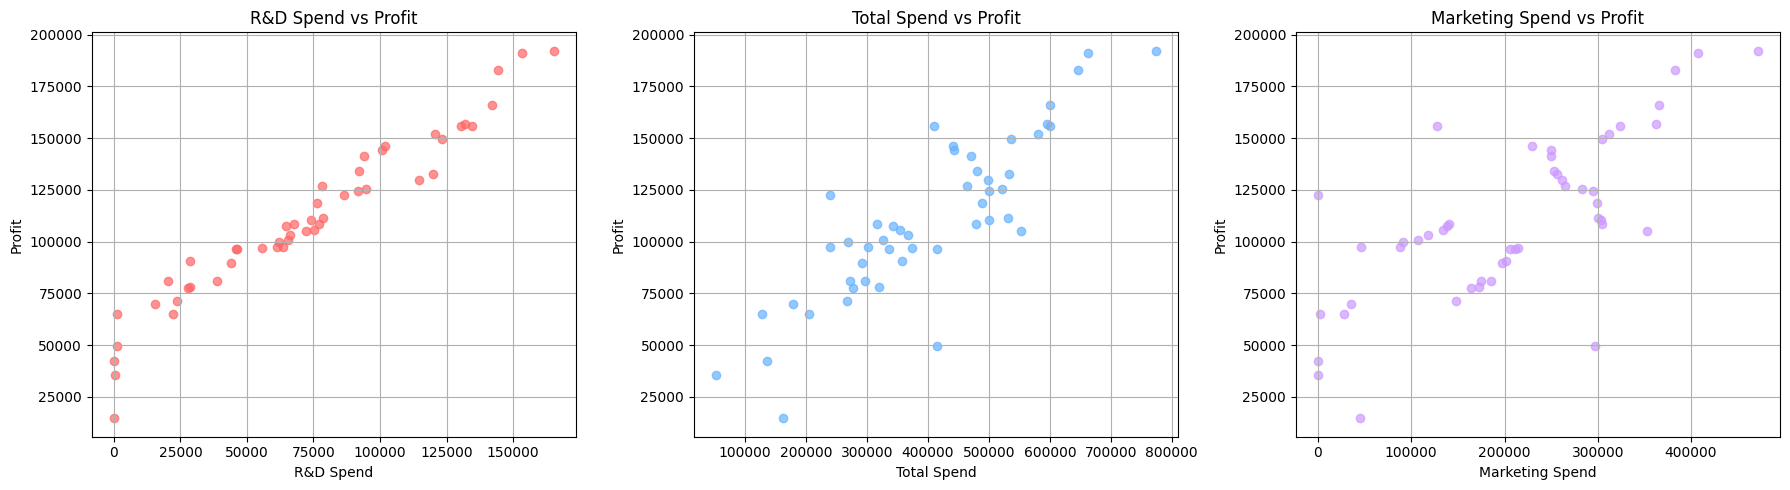

In [13]:
# verlilerimizi görselleştirelim. Profit ile R&D Spend, Total_Spend ve Marketing Spend'i görselleştirelim

fig, axes = plt.subplots(1,3, figsize=(18, 5))

colors = ['#FF6666', '#66B2FF', '#CC99FF']



axes[0].scatter(df['R&D Spend'], df['Profit'], c=colors[0], alpha =0.7)
axes[0].set_title('R&D Spend vs Profit', fontsize=12)
axes[0].set_xlabel('R&D Spend', fontsize=10)
axes[0].set_ylabel('Profit', fontsize=10)
axes[0].grid(True)



axes[1].scatter(df['Total_Spend'], df['Profit'], c=colors[1], alpha =0.7)
axes[1].set_title('Total Spend vs Profit', fontsize=12)
axes[1].set_xlabel('Total Spend', fontsize=10)
axes[1].set_ylabel('Profit', fontsize=10)
axes[1].grid(True)


axes[2].scatter(df['Marketing Spend'], df['Profit'], c=colors[2], alpha =0.7)
axes[2].set_title('Marketing Spend vs Profit', fontsize=12)
axes[2].set_xlabel('Marketing Spend', fontsize=10)
axes[2].set_ylabel('Profit', fontsize=10)
axes[2].grid(True)



plt.tight_layout()
plt.show()


In [14]:
# #idari işleri ayrıca görmek için bu şekilde tek bir ilişkiyi görselleştirmek için aşağıdaki gibi yazım da mevcuttur


# plt.scatter(df['Administration'], df['Profit'])
# plt.xlabel('Administration')
# plt.ylabel('Profit')
# plt.show()

In [15]:
# multiple regresyon için kümülatif bir veri seti oluşturalım

cdf = df[['R&D Spend', 'Total_Spend', 'Marketing Spend', 'Profit']]

cdf.head()

,R&D Spend,Total_Spend,Marketing Spend,Profit
0,165349.20,774031.10,471784.10,192261.83
2,153441.51,662521.60,407934.54,191050.39
3,144372.41,646243.88,383199.62,182901.99
4,142107.34,599667.53,366168.42,166187.94
5,131876.90,594552.97,362861.36,156991.12


In [16]:
from scipy.stats import skew

for col in cdf.columns:
    print(f'{col} Çarpıklık (skewness): {skew(cdf[col]):.2f}\n')

R&D Spend Çarpıklık (skewness): 0.13

Total_Spend Çarpıklık (skewness): 0.01

Marketing Spend Çarpıklık (skewness): -0.09

Profit Çarpıklık (skewness): -0.03



In [17]:
#Tüm değişkenkler simetrik veya simetriye yakın olduğundan dolayı dönüşüme ihtiyaç olmamaktadır.
#bu sebepten dolayı buradan sadece ölçeklendirme ile normalizasyon yapmaktayız



from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
X = df[['R&D Spend', 'Total_Spend', 'Marketing Spend']]
y = df[['Profit']]

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)


scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df['Profit'] = y_scaled

scaled_df.head()

,R&D Spend,Total_Spend,Marketing Spend,Profit
0,2.120099,2.431389,2.258091,2.119693
1,1.849924,1.708624,1.715071,2.088330
2,1.644155,1.603117,1.504708,1.877379
3,1.592762,1.301226,1.359863,1.444675
4,1.360643,1.268075,1.331738,1.206582


In [18]:
from sklearn.model_selection import train_test_split


# X = X_scaled_df
# y= df['Profit'] 

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# print(f'X Train set:  {X_train.shape}')
# print(f'X Test set:  {X_test.shape}')
# print(f'y Train set:  {y_train.shape}')
# print(f'y Train set:  {y_test.shape}')



from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(scaled_df, train_size=0.8, random_state = 42)
print(f'Train Set: {train_df.shape}\nTest Set: {test_df.shape}')



Train Set: (39, 4)
Test Set: (10, 4)


In [19]:
from sklearn.linear_model import LinearRegression

# Özellikleri ve hedefi ayır
X_train = np.asanyarray(train_df[['R&D Spend', 'Total_Spend', 'Marketing Spend']])
y_train = np.asanyarray(train_df['Profit'])

X_test = test_df[['R&D Spend', 'Total_Spend', 'Marketing Spend']]
y_test = test_df['Profit']

# Modeli eğit
model = LinearRegression()
model.fit(X_train, y_train)

model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
X_test = np.asanyarray(train_df[['R&D Spend', 'Total_Spend', 'Marketing Spend']])
y_test = np.asanyarray(train_df[['Profit']])

test_prediction = model.predict(X_test)

result_df = pd.DataFrame(
    {
        'Real Profit' : y_test.flatten(),
        'Estimated Profit' : test_prediction.flatten()
    }
)

result_df.head()

,Real Profit,Estimated Profit
0,0.619330,0.466679
1,1.206582,1.418528
2,-0.359981,-0.479880
3,1.019377,1.182618
4,1.444675,1.639478


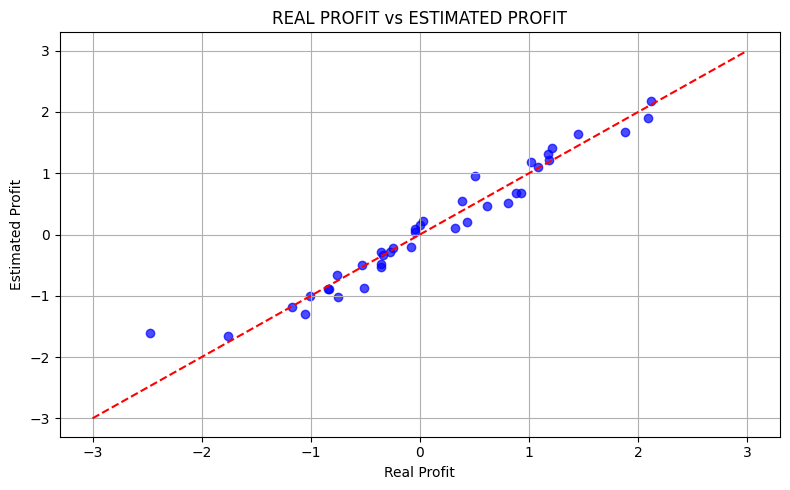

In [21]:
#Yukarıda yaptıüımız tahmin çalışmalarına göre gerçek profit ile tahmini profitlerin birbirine yakın olduğunu görmekteyiz.
#Şimdi yukarıda bulduğumuz değerleri göreselleştirelim

plt.figure(figsize=(8,5))
plt.scatter(result_df['Real Profit'], result_df['Estimated Profit'], color= 'blue', alpha=0.7)
plt.plot([-3,3], [-3,3], 'r--')
plt.xlabel('Real Profit')
plt.ylabel('Estimated Profit')
plt.title('REAL PROFIT vs ESTIMATED PROFIT')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test,test_prediction)
print(f'R2 Score {r2:.2f}')
mae = mean_absolute_error(y_test, test_prediction)
print(f'Mean Absolute Error {mae:.2f}')
mse = mean_squared_error(y_test, test_prediction)
print(f'Mean Squared Error {mse:.2f}')

#R2 Score 0.95  --- 1 e çok yakın yani 95% oranında yüksek ve başarılı bir sonuç alınmıştır
#Mean Absolute Error 0.16 --- ortalama hata birimi 0.16 çıkmıştır
#Mean Squared Error 0.05 --- Hata karelerinin ortalaması düşük çıkmıştır bu da kararlı tahminler aldığımızı göstermektedir



R2 Score 0.95
Mean Absolute Error 0.16
Mean Squared Error 0.05


Regülizasyonları uygulayarak modelin performansını arttırıyoruz (Losso, L1, L2, Ridge)


Regülizasyon (cezalandırmalı regresyon) yöntemlerini uygulayarak modelinin aşırı öğrenme riskini azaltabilir ve genelleme yeteneğini artırabiliriz

Lasso (L1 penalty)

Ridge (L2 penalty)

ElasticNet (L1 + L2 kombinasyonu)


Ridge Regression genellikle çoklu doğrusal ilişkiler (multicollinearity) durumlarında iyi sonuç verir.

Lasso daha basit modeller üretir (bazı katsayıları sıfırlar).

ElasticNet, her ikisinin avantajlarını birleştirir.




In [23]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet


def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    

    r2 = r2_score(y_test,predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)


    return {
        'Model' : model.__class__.__name__,
        'R2' : round(r2, 3),
        'MAE' : round(mae, 3),
        'MSE' : round(mse, 3),
        'RMSE' : round(rmse, 3)
    }



models = [
    Lasso(alpha=1.0),
    Ridge(alpha=1.0),
    ElasticNet(alpha=1.0)
]

results = []

for model in models:
    results.append(evaluate_model(model, X_train, X_test, y_train, y_test))


results_df = pd.DataFrame(results)

results_df

,Model,R2,MAE,MSE,RMSE
0,Lasso,0.000,0.830,1.031,1.016
1,Ridge,0.949,0.167,0.052,0.229
2,ElasticNet,0.566,0.537,0.448,0.669


Ridge Regression, açık ara en iyi performansa sahip model. R² çok yüksek, hatalar çok düşük.

Lasso Regression, bu veri setinde işe yaramamış gibi. R² = 0.00 → model hedef değişkeni hiç açıklayamıyor. Çünkü Lasso bazı önemli özellikleri sıfırlamış olabilir.

ElasticNet, hem L1 hem L2 içerdiği için daha esnek ama L1’in etkisiyle performansı Ridge'e göre düşük kalmış.

## Ridge Modelini Eğit ve Test Et

In [ ]:
# Modeli oluştur

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)


# Tahmin yap

ridge_predict = ridge_model.predict(X_test)

# Metrikleri hesapla

r2 = r2_score(y_test, ridge_predict)
mae = mean_absolute_error(y_test, ridge_predict)
mse = mean_squared_error(y_test, ridge_predict)
rmse = np.sqrt(mse)


# Sonuçları yazdır

print(f'Ridge Model Performansı: ')
print(f'R2 Score: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


#R² = 0.95: Model, varyansın %95’ini açıklıyor. Bu oldukça güçlü bir sonuç.

#MAE ve RMSE düşük: Tahminlerinizin gerçek değerlere oldukça yakın olduğunu gösteriyor.

#RMSE < MAE × 2: Büyük hataların çok fazla olmadığı anlamına gelir.

Ridge Model Performansı: 
R2 Score: 0.95
Mean Absolute Error: 0.16
Mean Squared Error: 0.05
Root Mean Squared Error: 0.22


In [28]:
# Tahmin ve gerçek değerleri tablo halinde göster
ridge_comparison = pd.DataFrame({
    'Gerçek Profit': y_test.flatten(),
    'Tahmini Profit (Ridge)': ridge_predict.flatten()
})

ridge_comparison.head()

,Gerçek Profit,Tahmini Profit (Ridge)
0,0.619330,0.472139
1,1.206582,1.409628
2,-0.359981,-0.486427
3,1.019377,1.174491
4,1.444675,1.625157


### Ridge Modeli ile predict edip metricler ile test ettik şimdi bu outputlarımızı görselleştirelim

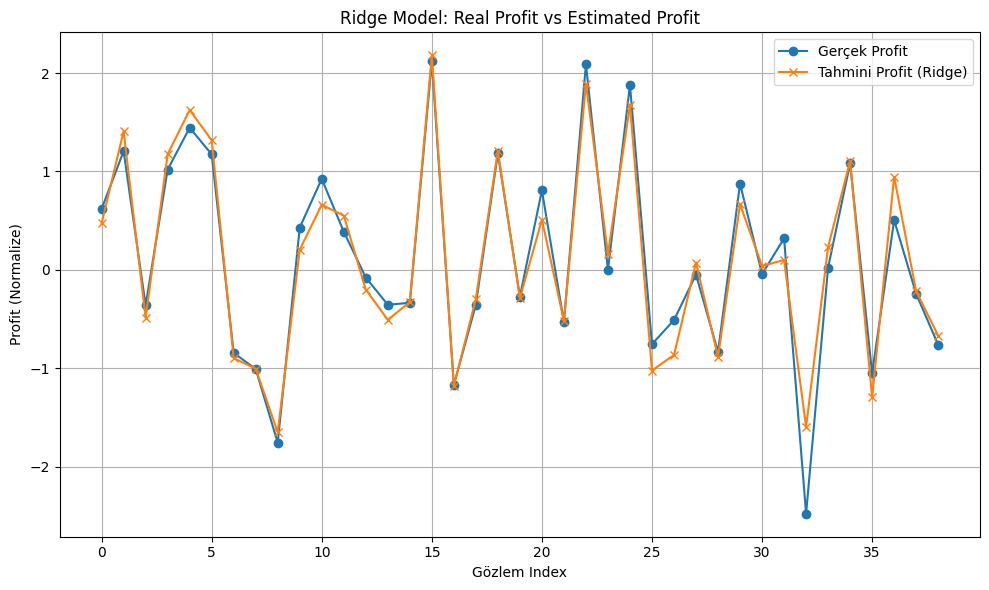

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.flatten(), label='Gerçek Profit', marker='o')
plt.plot(ridge_predict.flatten(), label='Tahmini Profit (Ridge)', marker='x')
plt.title('Ridge Model: Real Profit vs Estimated Profit')
plt.xlabel('Gözlem Index')
plt.ylabel('Profit (Normalize)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()